In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset using Seaborn library
data = pd.read_csv('IRIS.csv')

print(data.head())
print(data["species"].value_counts())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Separating the independent variables from dependent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, stratify=y)

print("\nOriginal Data:")
print(data["species"].value_counts())

X_train['target'] = y_train
X_test['target'] = y_test

print("\nX_train:")
print(X_train["target"].value_counts())
print("\nX_test:")
print(X_test["target"].value_counts())

X_train = X_train.drop(columns=["target"])
X_test = X_test.drop(columns=["target"])


Original Data:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

X_train:
target
Iris-virginica     35
Iris-versicolor    35
Iris-setosa        35
Name: count, dtype: int64

X_test:
target
Iris-versicolor    15
Iris-virginica     15
Iris-setosa        15
Name: count, dtype: int64


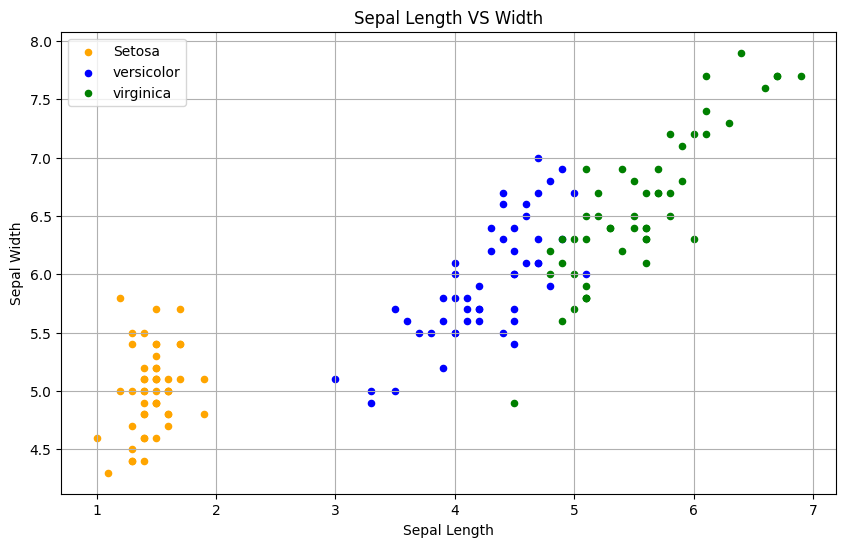

In [4]:
fig = data[data.species=='Iris-setosa'].plot(kind='scatter',x='petal_length',y='sepal_length',color='orange', label='Setosa')
data[data.species=='Iris-versicolor'].plot(kind='scatter',x='petal_length',y='sepal_length',color='blue', label='versicolor',ax=fig)
data[data.species=='Iris-virginica'].plot(kind='scatter',x='petal_length',y='sepal_length',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

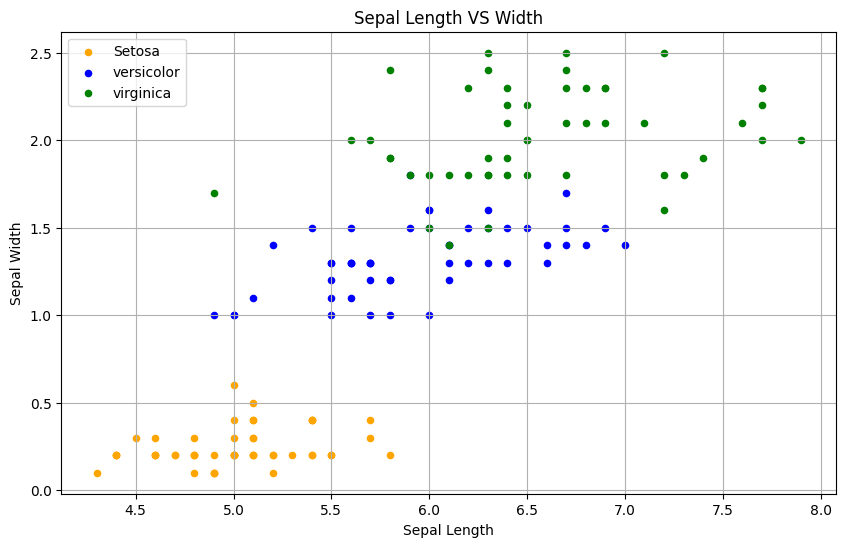

In [5]:
fig = data[data.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='petal_width',color='orange', label='Setosa')
data[data.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
data[data.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## SVM Model with C = 0.1

In [6]:
from sklearn.svm import SVC
model=SVC(C=0.1)

model.fit(X_train, y_train)

from sklearn import metrics

y_pred=model.predict(X_test)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(y_pred_train,y_train))
print('The accuracy of the SVM is:',metrics.accuracy_score(y_pred_test,y_test))

model.get_params()['C']

The accuracy of the SVM is: 0.9238095238095239
The accuracy of the SVM is: 0.9777777777777777


0.1

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


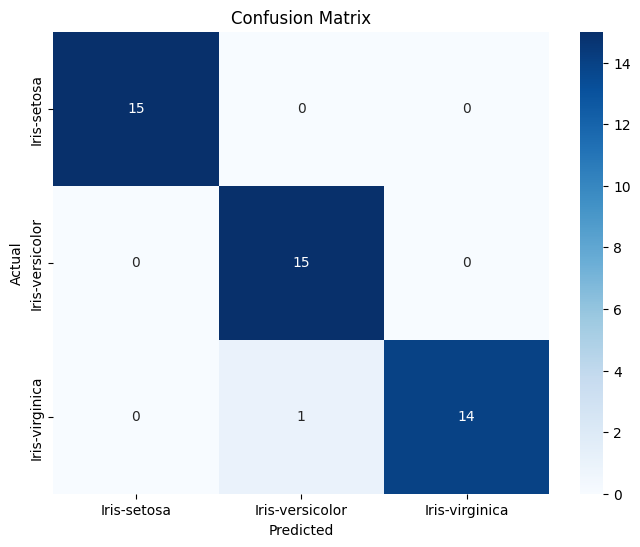


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
#  Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## SVM Model with C = 1

The accuracy of the SVM is: 0.9809523809523809
The accuracy of the SVM is: 1.0
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


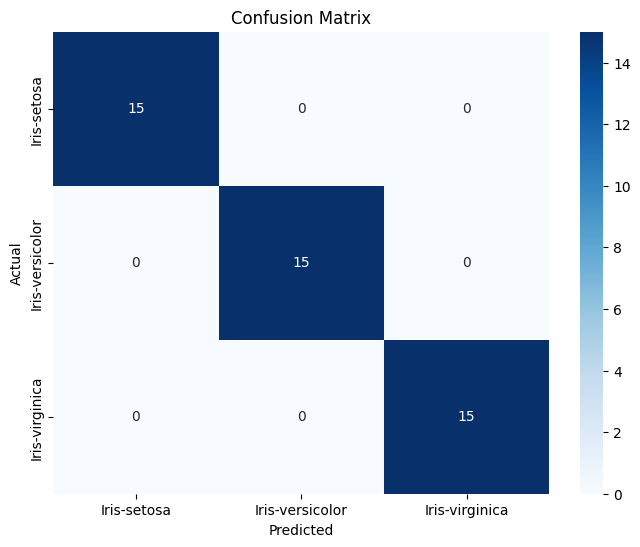


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

(105, 4)


In [9]:
from sklearn.svm import SVC
model2=SVC(C=1)

model2.fit(X_train, y_train)

y_pred_train_2 = model2.predict(X_train)
y_pred_test_2 = model2.predict(X_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(y_pred_train_2,y_train))
print('The accuracy of the SVM is:',metrics.accuracy_score(y_pred_test_2,y_test))

from sklearn.metrics import confusion_matrix, classification_report
#  Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_2)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))